# Coding a deep neural network using Keras

Keras is a friendly (and powerful) python library design for developing and evaluating deep learning models (https://keras.io/).

In this tutorial, we will construct a deep neural network using Keras, train it with a dataset for a simple classification task, and evaluate its performance.

Let's start importing the libraries to be used in this tutorial. Run the next section by clicking on it and press Ctrl+Enter.

In [4]:
# import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# First step: Load and split the data

We are going to use a well-known diabetes dataset (a typical machine learning repository). It describes certain health parameters for a population of Pima Indians and whether they had an onset of diabetes within five years. For our purpose, this is a binary classification problem: if the person has diabetes is labeled as 1, and if not as 0. Let's check the dataset:

In the home folder of this tutorial, open the file 'pima-indians-diabetes.csv'. It contains 9 columns, where the first 8 are numerical values that we call attributes indicating a subject characteristic like age, blood pressure, body mass index among others. The last column indicates the binary classification. The dataset contains records for 768 subjects, that we call instances. Several constraints were placed on the selection of these instances from a larger database.  In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Dataset details can be check here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names. 

To do:
- Load the Pima Indians diabetes dataset using the NumPy method 'loadtxt'.

Note: From now on, you will need to fill the _ (underscores) in the codes given. 

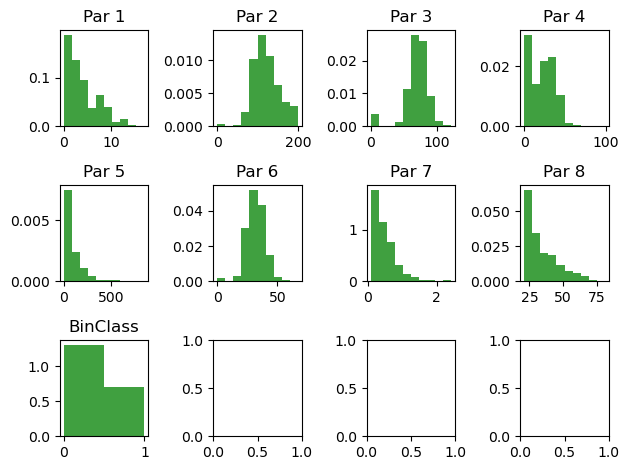

In [6]:
# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

# Uncomment and rerun for a quick view on pars distribution
from aux_func import plot_hist
plot_hist(dataset)

To properly evaluate our model, we need to split the dataset into training and testing subsets. Why? Because we will be testing the performance of our model with data not employed in training. If the model performs similarly in both datasets, this is indicating a robust model. 

To do:
- Split the dataset (by rows), keeping 90% for the training and 10% for the testing.  
- Check that you pass the test (output 'Correct split') 

In [9]:
# define some usefull variables for spliting
p = 10 # % percentage of testing data
nr = len(dataset[:,0]) # total number of instances (rows)
nt = int(nr/p) # number of instances for training
# split into input (X) and output (y) variables for training and testing
X_train = dataset[:-nt,0:8]
y_train = dataset[:-nt,8]
# for testing 
X_test = dataset[-nt:,0:8]
y_test = dataset[-nt:,8]

# checking
if nr == (len(y_test)+len(y_train)):
    print('Correct split')
else:
    print('Incorrect split')

Correct split


# Second step: Build the model

Now we need to define our neural network model, which is basically a sequence of neuron layers connected by weights. We will use Keras for defining this sequence of layers. 
We will create a 'Sequential model' (Keras class: https://keras.io/api/models/sequential/) and add layers one at a time to build our network architecture. We will also use the 'Dense' class to define the fully connected neuron layers and specify the activation function between them. 

In this example, we will use a fully connected neural network structure with four layers. 

To do:
- Create an object called 'model' from the Sequential class (done).
- Add a first layer (the input layer). Ensure that the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
- Add a second hidden layer with 12 neurons (nodes). 
- Add a third hidden layer with 8 neurons (nodes). 
- Add a forth output layer.
- Check that the model is correct by printing a model summary. 

Note: the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


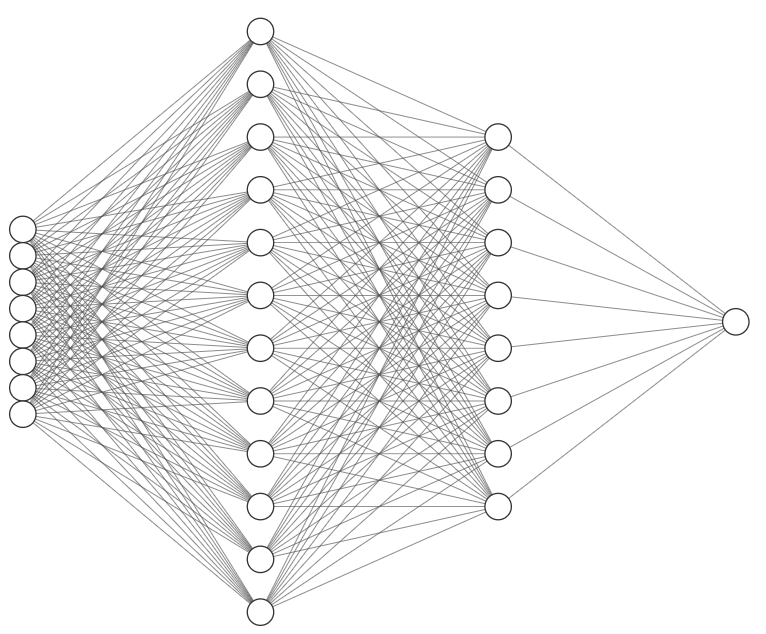

In [10]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #relu: rectified linear unit activation function
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #sigmoid: Sigmoid function

# checking
print(model.summary())
# draw the network (this just work for the architecture 8-12-8-1)
from IPython.display import Image
Image("img/nn_1_draw.png", width = 500)

How do we know the number of layers and their types?
This is a tough question. Often the best network structure is found through a process of trial and error experimentation. Generally, it would help if you had a network large enough to capture the structure of the problem (this will become more clear in the next two tutorials).

# Third step: Compile the model

Compile means convert the code into a machine code (or low-level code) from where the code can be executed. When we execute it, Keras use numerical libraries as TensorFlow or Theano to choose the best way to represent the network for training and making predictions to run on your hardware.

Also, when compiling we need to specify how the training is going to be conducted. Remember that training means finding the best set of weights to map inputs to outputs in the dataset. In this case, we need to specify the loss function (to evaluate the sets of weights), the optimizer (like gradient descent), and some particular metrics that we would like to collect. 

To do:
- Compile our Keras Sequential model using the 'compile' method. Use as the loss function 'binary_crossentropy', as optimizer 'adam' (an efficient stochastic gradient descent algorithm), and the metric 'accuracy'.

For details go to:
- binary_crossentropy: https://keras.io/api/losses/
- adam: https://keras.io/api/optimizers/adam/
- accuracy: https://keras.io/api/metrics/accuracy_metrics/

In [12]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fourth step: Fit the model to the dataset


Now we are ready to execute the model on some data.
We can simply train our model calling the 'fit' method in our Keras model. 

The training occurs over 'epochs' (epoch: one pass through all of the rows in the training dataset), and each epoch is split into 'batches' (batch: one or more samples considered by the model within an epoch before weights are updated). In other words, epochs are the number of iterations that the training process will go through and the batch the number of samples that it will consider in each iteration to update the weights.

To do: 
- Fit the model to the training dataset. Set the epochs to 300 and the batch size to 10. The first two arguments of the fit method are the input and output of the training dataset. 

In [14]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=10, verbose = False)

# Fifth step: Evaluate the model

Now that we have trained our network, we are ready to evaluate it. First, let's check how it performs of the training dataset. We will use the 'evaluate' method in our Keras model and report the accuracy. The method will generate a prediction for each input and compare model outputs with the true values for the training dataset and calculate the accuracy as a percentage of correct results (the method collects scores, including the average loss and any metrics you have configured, such as accuracy).

To do:
- Evaluate the model accuracy on the training dataset. The two arguments of the evaluate method are the input and output of the training dataset. 

Note: The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.  

In [15]:
# evaluate the keras model on training data
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

692/692 [==============================] - 0s 39us/step
Accuracy: 81.79


Around 80%? that sounds great, right? Yeah, nah. It's easy to perform great on data that the model has already seen. The true test needs to be done on data not seen by the network during training.

To do:
- Evaluate the model accuracy on the testing dataset.

In [16]:
# evaluate the keras model 80 test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

76/76 [==============================] - 0s 39us/step
Accuracy: 77.63


Not bad right? What? Were you expecting? a 100% 🤣? 

# Sixth step: Make predictions

Now you can use your Keras trained (and tested) model to make predictions given a certain input. 

For example, we receive the following data from a new person (instance) beloging to the same group (pima indians): 

5,166,72,19,175,25.8,0.587,51

We can now use our neural network to predict if this person has diabetes (or could develop it). We can use the 'predict' method in our model. 

To do:
- Predict if the new person has or could develop diabetes. 


In [18]:
# input new instance
x_new = np.array([[5,166,72,19,175,25.8,0.587,51], [5,166,72,19,175,25.8,0.587,51]])
# make probability predictions with the model
predictions = model.predict(x_new)
print('Output: '+str(np.round(predictions[0][0])))

Output: 1.0


If you get 1.0 as an output that means that the person potentially has diabetes, bad for the person but good for us on catching that!

Finally, run the next command to see where all this machine learning thing is going to... 

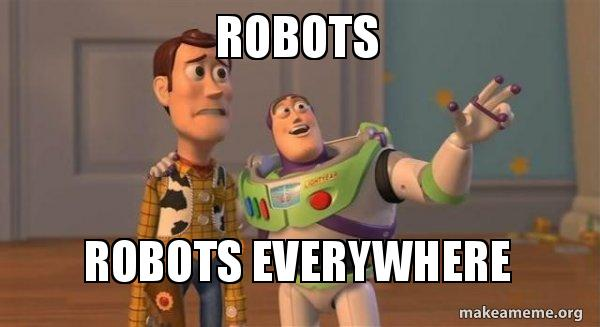

In [19]:
from IPython.display import Image
Image("img/rand/r_everywhere.jpg", width = 500)

# Final Notes

In this tutorial, we have covered the following topics when creating a deep neural network for a simple classification task using Keras:

- Load and split data.
- Define the model.
- Compile the model.
- Fit the model.
- Evaluate the model.
- Predict with the model.

I hope that you have enjoyed it, and I invite you to keep exploring this awesome topic. Here is a link with multiple dataset repositories for you to play with: https://archive.ics.uci.edu/ml/index.php. Good luck!